In [1]:
def importdata():
    df = pd.read_csv('../data/df_points_valid_geo_split_at_midnight_add_h3_index_v100.csv')
    df = df[['bike_id','lat','lng','timestood','time_start','time_end','flag','hex_id']]
    
    df['time_start'] = pd.to_datetime(df['time_start'])
    
    return df

In [2]:
def create_onedf_hexid(df,hex_id):
    onedfhexid = pd.DataFrame(columns= ['bike_id','lat','lng','timestood','time_start','time_end','flag','hex_id'])
    for ind in df.index:
        if df['hex_id'][ind] == hex_id:
            onedfhexid.loc[df.index[ind]] = df.iloc[ind]
            #onedfhexid.append(df[ind], ignore_index = True)
    return onedfhexid.reset_index(drop=True)

In [3]:
def create_tsdata():
    rng = pd.date_range('2019-01-01', periods=365, freq='D')
    tsdata = pd.DataFrame({ 'date': rng, 'idle_time' : np.nan}) 
    return tsdata.set_index('date')

In [4]:
def add_rows_to_days(tsdata,onedfhexid):
    # iteriere über alle Tage
    for date in tsdata.index:
        list = []
        # Adde alle Rows in die List wenn Tag = Tag
        for ind in onedfhexid.index:
            if date.date() == onedfhexid['time_start'][ind].date():
                list.append(onedfhexid['timestood'][ind])
        #print(list)        
        # Setze Mittelwert für Tage
        if len(list) == 0:
            continue
        else:
            tsdata['idle_time'][date] = statistics.mean(list)
    return tsdata

In [15]:
def get_rows_one_day(day,onedfhexid):
    list=[]
    for ind in onedfhexid.index:
        if day == onedfhexid['time_start'][ind].date():
            list.append(onedfhexid['timestood'][ind])
    print(list)
    print(statistics.mean(list))

In [16]:
def plot(x):
    # setting figure size to 12, 10
    plt.figure(figsize=(12, 10))
 
    # Labelling the axes and setting
    # a title
    plt.xlabel("date")
    plt.ylabel("idle_time")
     
    # plotting the "A" column alone
    plt.plot(x)

In [17]:
def fix_missing_values(tsdata):
    data_freq = tsdata.asfreq('D')
    data_freq = data_freq.ffill()
    return data_freq

# Main

In [8]:
import pandas as pd
pd.options.mode.chained_assignment = None
from tqdm import tqdm
from datetime import timedelta, datetime, date
pd.set_option('display.max_rows', None)

import numpy as np
import statistics
import matplotlib.pyplot as plt


year = 2019
hex_id = '8a1f1a8d9d97fff'

df = importdata()

onedfhexid = create_onedf_hexid(df,hex_id)
#onedfhexid

tsdata = create_tsdata()
#tsdata

tsdata = add_rows_to_days(tsdata,onedfhexid)

tsdata = fix_missing_values(tsdata)
tsdata

#plot(data_freq)

,idle_time
date,
2019-01-01,554.235294
2019-01-02,750.529412
2019-01-03,568.193548
2019-01-04,632.657895
2019-01-05,692.636364
2019-01-06,734.451613
2019-01-07,741.583333
2019-01-08,879.428571
2019-01-09,920.416667


In [18]:
import datetime

d = datetime.date(2019, 8, 11)
get_rows_one_day(d,onedfhexid)

[1370, 1439, 1439, 1439]
1421.75


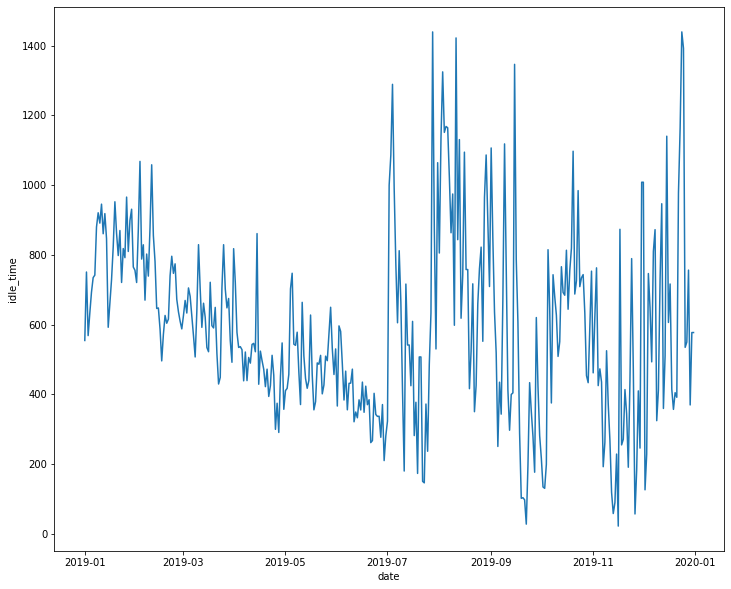

In [19]:
plot(tsdata)

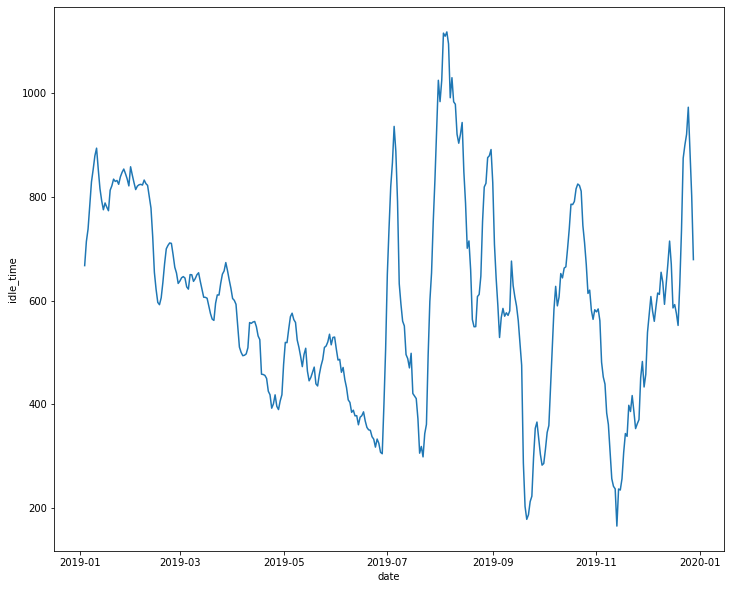

In [21]:
data_columns = ['idle_time']
data_7d_rol = tsdata[data_columns].rolling(window = 7, center = True).mean()
plot(data_7d_rol)

# Testing

In [22]:
data_2m_rol = tsdata[data_columns].rolling(window = 60, center = True).mean()

In [23]:
data_2m_rol

,idle_time
date,
2019-01-01,NaN
2019-01-02,NaN
2019-01-03,NaN
2019-01-04,NaN
2019-01-05,NaN
2019-01-06,NaN
2019-01-07,NaN
2019-01-08,NaN
2019-01-09,NaN


Text(0.5, 1.0, 'Trends in idel time of bikes')

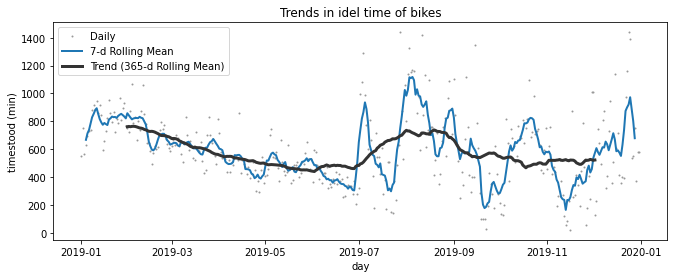

In [24]:
fig, ax = plt.subplots(figsize = (11,4))
# plotting daily data
ax.plot(tsdata['idle_time'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')
# plotting 7-day rolling data
ax.plot(data_7d_rol['idle_time'], linewidth=2, label='7-d Rolling Mean')
# plotting annual rolling data
ax.plot(data_2m_rol['idle_time'], color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')
# Beautification of plot
#ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('day')
ax.set_ylabel('timestood (min)')
ax.set_title('Trends in idel time of bikes')

# DeTrend the data
## with first order

In [25]:
data_first_order_diff = tsdata[data_columns].diff()

In [26]:
data_first_order_diff

,idle_time
date,
2019-01-01,NaN
2019-01-02,196.294118
2019-01-03,-182.335863
2019-01-04,64.464346
2019-01-05,59.978469
2019-01-06,41.815249
2019-01-07,7.131720
2019-01-08,137.845238
2019-01-09,40.988095


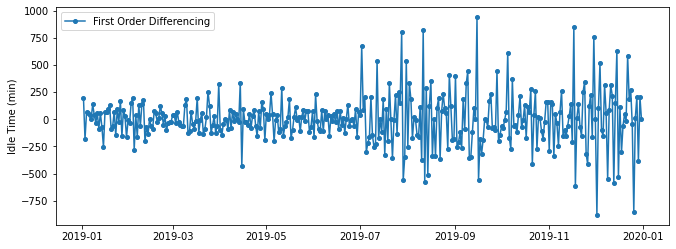

In [27]:
start, end = '2019-01', '2019-12'

fig, ax = plt.subplots(figsize=(11, 4))

ax.plot(data_first_order_diff.loc[start:end, 'idle_time'],
marker='o', markersize=4, linestyle='-', label='First Order Differencing')
ax.set_ylabel('Idle Time (min)')
ax.legend();

<AxesSubplot:xlabel='date'>

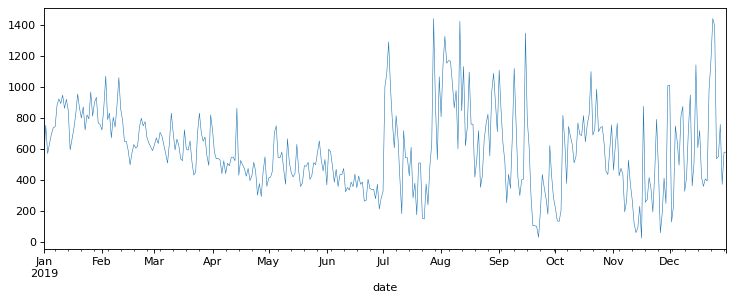

In [28]:
plt.figure(figsize=(11,4), dpi= 80)
tsdata['idle_time'].plot(linewidth = 0.5)

# Autocorellation

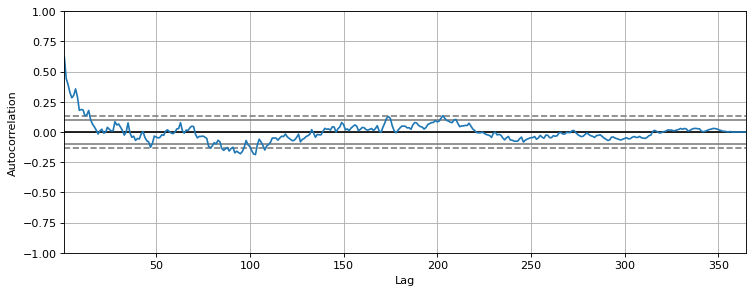

In [29]:
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(tsdata.loc['2019-01': '2019-12', 'idle_time']);